### In this notebook, I categorized the YouTube channels into various journal types namely;

   ### 1. Comedy
   ### 2. Lifestyle
   ### 3. Talk show
   ### 4. Podcast 
   ### 5. Storytelling

### The analysis will concentrate on the leading channels in each category based on views and subscribers, highlighting the top three most-watched videos from the channel with the highest views.

## Import libraries

In [14]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

## Load API Key

In [15]:
# Load environment variables from the .env file
load_dotenv()

# Get the API key from the environment variable
api_key = os.getenv("YOUTUBE_API_KEY")

## Import channel IDS

In [16]:
# Comedy category
comedy_channel_ids = ['UCQfjhBlCaSwqIh3T3COfCDg', # KADUSKO Tv
              'UCkV3t4uxBsi8jYj3wjqooeQ', # NJUGUSH TV
              'UC0YG5UA1s2gLb5tDfUCIWtg', # Churchill Television
              'UC7MGnWilDcg157op0eKI1Tg', # Henry DeSagu
              'UClkXE1xfSwdx07G_MkFgQGA', # Eddie Butita
              'UCSkQTaT1wFrmPCK5d-Zr2Ng', # Awinja Nyamwalo - Jacky Vike
              'UCjG66-ryVCszrs7k_Y2pn3Q', # Flaqo Raz
              'UCiXj0BfxM0WQGFr9mxdR0qg', # Crazy Kennar
]
youtube_comedy = build('youtube', 'v3', developerKey=api_key)


# Lifestyle Category
lifestyle_channel_ids = ['UC0UslOx9EYxnk_4SFSHj8hA', # DIANA BAHATI
              'UCHVTpHXp43Giiwag5s6o8xQ', # THE WAJESUS FAMILY
              'UCUKnloR_w6diioiPavmH8qw', # JACKIE MATUBIA TV
              'UCMMmy64_0rySSPUu0xohuCQ' # Thee Pluto Show
]
youtube_lifestyle = build('youtube', 'v3', developerKey=api_key)


# Talkshow Category
talkshow_channel_ids = ['UC_9xRXWjRrz_Jy7SWhUnBBw', # Obinna TV Extra
              'UCl6ICaB9meBcSMQ5Zmr446g', # Tuko / Tuco - Kenya
              'UCqWSW6zEdoEv_0p5Vw-uLZQ' # Dr Ofweneke TV
]
youtube_talkshow = build('youtube', 'v3', developerKey=api_key)

# Podcast Category
podcast_channel_ids = ['UCE3KVkSH1GwUtAAMcVcJ3QQ', # UpSyd Digital Networks
              'UCa2gldA2ivhzMwIJRA5683w', # Lynn Ngugi
              'UC6fVFxrbf0HDRW3B2mdWFGA', # TMI Podcast KE
              'UChQXn6sL9ENIpA74qqPG1HA', # 3MenArmy Kenya
              'UC5h4-WH0LAV4CWs380yM33A', # Iko Nini
              'UCmBQsChFjOTcqv7D6sT8dPw', # ManTalk Ke
              'UCEYqAce8R78wNRAkb8wIuVQ', # Sandwich Podcast KE
              'UCgSP5G3RmKJl72aA2lBV_Jw' # Boxpod TV
                
]
youtube_podcast = build('youtube', 'v3', developerKey=api_key)


# Storytelling Category
story_telling_channel_ids = ['UC4tjY2tTltEKePusozUxtSA' # Abel Mutua
]
youtube_story_telling = build('youtube', 'v3', developerKey=api_key)


## Function to get channel statistics

In [9]:
# Function to get comedy channel statistics
def get_channel_stats(youtube_comedy, comedy_channel_ids):
    all_data = []
    request = youtube_comedy.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(comedy_channel_ids))
    response = request.execute()
    

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                   Subscribers = response['items'][i]['statistics']['subscriberCount'],
                   Views = response['items'][i]['statistics']['viewCount'],
                   Total_videos = response['items'][i]['statistics']['videoCount'],
                   Playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return all_data


# Function to get lifestyle channel statistics
def get_channel_stats(youtube_lifestyle, lifestyle_channel_ids):
    all_data = []
    request = youtube_lifestyle.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(lifestyle_channel_ids))
    response = request.execute()
    

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                   Subscribers = response['items'][i]['statistics']['subscriberCount'],
                   Views = response['items'][i]['statistics']['viewCount'],
                   Total_videos = response['items'][i]['statistics']['videoCount'],
                   Playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return all_data

# FUnction to get talk show channel statistics
def get_channel_stats(youtube_talkshow, talkshow_channel_ids):
    all_data = []
    request = youtube_talkshow.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(talkshow_channel_ids))
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                   Subscribers = response['items'][i]['statistics']['subscriberCount'],
                   Views = response['items'][i]['statistics']['viewCount'],
                   Total_videos = response['items'][i]['statistics']['videoCount'],
                   Playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    return all_data


# Funtion to get Podcast channel statistics
def get_channel_stats(youtube_podcast, podcast_channel_ids):
    all_data = []
    request = youtube_podcast.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(podcast_channel_ids))
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                   Subscribers = response['items'][i]['statistics']['subscriberCount'],
                   Views = response['items'][i]['statistics']['viewCount'],
                   Total_videos = response['items'][i]['statistics']['videoCount'],
                   Playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    return all_data


# Funtion to get story telling channel statistics
def get_channel_stats(youtube_story_telling, story_telling_channel_ids):
    all_data = []
    request = youtube_story_telling.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(story_telling_channel_ids))
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                   Subscribers = response['items'][i]['statistics']['subscriberCount'],
                   Views = response['items'][i]['statistics']['viewCount'],
                   Total_videos = response['items'][i]['statistics']['videoCount'],
                   Playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    return all_data


## Create a Pandas DataFrame

### Comedy DataFrame

In [10]:
comedy_channel_stats = get_channel_stats(youtube_comedy, comedy_channel_ids)
comedy_channel_data = pd.DataFrame(comedy_channel_stats)
comedy_channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,KADUSKO Tv,561000,223661424,639,UUQfjhBlCaSwqIh3T3COfCDg
1,Awinja Nyamwalo - Jacky Vike,415000,84279233,273,UUSkQTaT1wFrmPCK5d-Zr2Ng
2,NJUGUSH TV,669000,109310764,898,UUkV3t4uxBsi8jYj3wjqooeQ
3,Henry DeSagu,680000,106937934,633,UU7MGnWilDcg157op0eKI1Tg
4,Crazy Kennar,666000,169729530,631,UUiXj0BfxM0WQGFr9mxdR0qg
5,Churchill Television,2440000,752768969,5359,UU0YG5UA1s2gLb5tDfUCIWtg
6,Flaqo Raz,804000,147000272,259,UUjG66-ryVCszrs7k_Y2pn3Q
7,Eddie Butita,352000,33724059,86,UUlkXE1xfSwdx07G_MkFgQGA


### LIfestyle DataFrame

In [5]:
lifestyle_channel_stats = get_channel_stats(youtube_lifestyle, lifestyle_channel_ids)
lifestyle_channel_data = pd.DataFrame(lifestyle_channel_stats)
lifestyle_channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,THE WAJESUS FAMILY,828000,184117107,844,UUHVTpHXp43Giiwag5s6o8xQ
1,DIANA BAHATI,1150000,231564596,859,UU0UslOx9EYxnk_4SFSHj8hA
2,JACKIE MATUBIA TV,299000,22377848,213,UUUKnloR_w6diioiPavmH8qw
3,Thee Pluto Show,974000,253917694,1205,UUMMmy64_0rySSPUu0xohuCQ


### Talk show¶ DataFrame

In [6]:
talkshow_channel_stats = get_channel_stats(youtube_talkshow, talkshow_channel_ids)
talkshow_channel_data = pd.DataFrame(talkshow_channel_stats)
talkshow_channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Tuko / Tuco - Kenya,1100000,237867561,1900,UUl6ICaB9meBcSMQ5Zmr446g
1,Obinna TV Extra,376000,55180505,1210,UU_9xRXWjRrz_Jy7SWhUnBBw
2,Dr Ofweneke TV,108000,5734454,278,UUqWSW6zEdoEv_0p5Vw-uLZQ


### Podcast DataFrame

In [7]:
podcast_channel_stats = get_channel_stats(youtube_podcast, podcast_channel_ids)
podcast_channel_data = pd.DataFrame(podcast_channel_stats)
podcast_channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Iko Nini Podcast,150000,37661684,3004,UU5h4-WH0LAV4CWs380yM33A
1,ManTalk Ke,42600,2473788,263,UUmBQsChFjOTcqv7D6sT8dPw
2,Boxpod TV,35900,3434093,189,UUgSP5G3RmKJl72aA2lBV_Jw
3,UpSyd Digital Networks,85500,11775927,670,UUE3KVkSH1GwUtAAMcVcJ3QQ
4,Sandwich Podcast KE,33700,3281545,155,UUEYqAce8R78wNRAkb8wIuVQ
5,TMI Podcast KE,137000,14140796,371,UU6fVFxrbf0HDRW3B2mdWFGA
6,3MenArmy Kenya,229000,31653062,863,UUhQXn6sL9ENIpA74qqPG1HA
7,Lynn Ngugi,1150000,156323858,507,UUa2gldA2ivhzMwIJRA5683w


### Storytelling DataFrame

In [8]:
story_telling_channel_stats = get_channel_stats(youtube_story_telling, story_telling_channel_ids)
story_telling_channel_data = pd.DataFrame(story_telling_channel_stats)
story_telling_channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Abel Mutua,693000,121650577,477,UU4tjY2tTltEKePusozUxtSA


## Convert datatype to int

In [9]:
# Comedy data to int
comedy_channel_data['Subscribers'] = pd.to_numeric(comedy_channel_data['Subscribers'])
comedy_channel_data['Views'] = pd.to_numeric(comedy_channel_data['Views'])
comedy_channel_data['Total_videos'] = pd.to_numeric(comedy_channel_data['Total_videos'])

# Lifestle data to int
lifestyle_channel_data['Subscribers'] = pd.to_numeric(lifestyle_channel_data['Subscribers'])
lifestyle_channel_data['Views'] = pd.to_numeric(lifestyle_channel_data['Views'])
lifestyle_channel_data['Total_videos'] = pd.to_numeric(lifestyle_channel_data['Total_videos'])

# Talkshow data to int
talkshow_channel_data['Subscribers'] = pd.to_numeric(talkshow_channel_data['Subscribers'])
talkshow_channel_data['Views'] = pd.to_numeric(talkshow_channel_data['Views'])
talkshow_channel_data['Total_videos'] = pd.to_numeric(talkshow_channel_data['Total_videos'])

# Podcast data to int
podcast_channel_data['Subscribers'] = pd.to_numeric(podcast_channel_data['Subscribers'])
podcast_channel_data['Views'] = pd.to_numeric(podcast_channel_data['Views'])
podcast_channel_data['Total_videos'] = pd.to_numeric(podcast_channel_data['Total_videos'])

# Story telling data to int
story_telling_channel_data['Subscribers'] = pd.to_numeric(story_telling_channel_data['Subscribers'])
story_telling_channel_data['Views'] = pd.to_numeric(story_telling_channel_data['Views'])
story_telling_channel_data['Total_videos'] = pd.to_numeric(story_telling_channel_data['Total_videos'])


In [10]:
# Check data type
comedy_channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
Playlist_id     object
dtype: object

# VISUALIZATIONS

## 1. Comedy Category Views by YouTube Channel

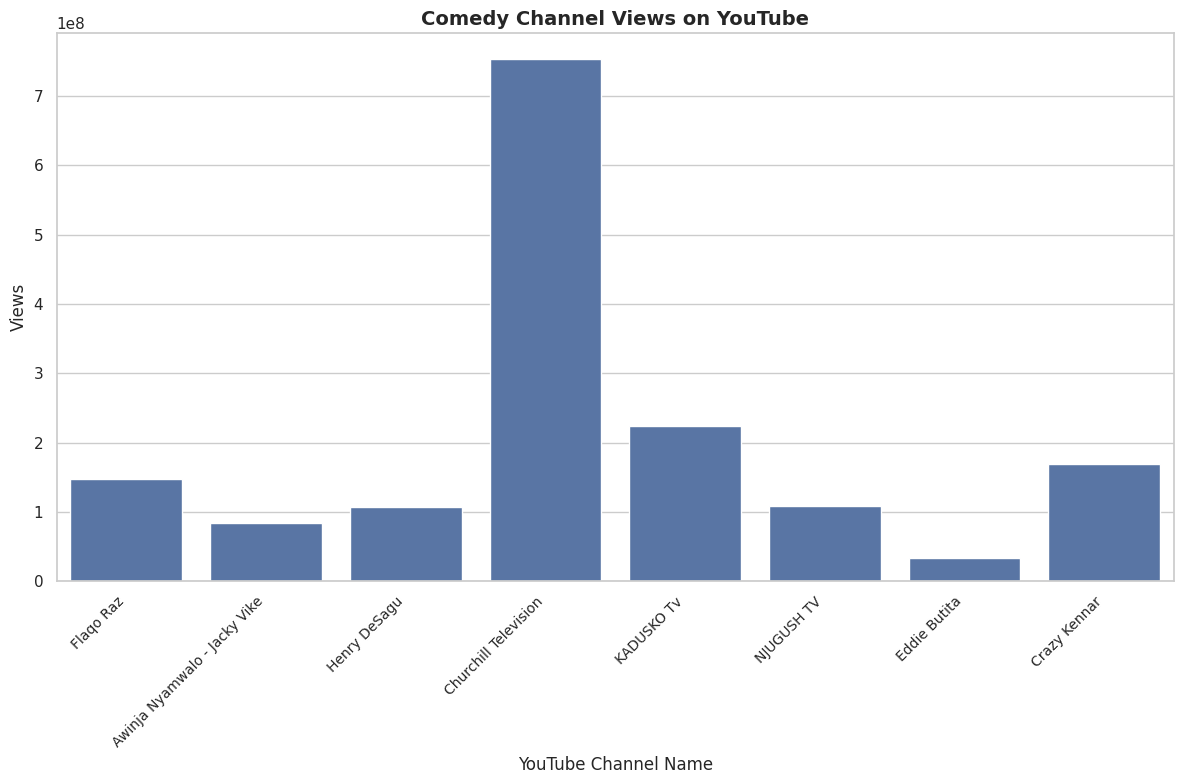

In [11]:
# Set figure size and style
sns.set(style="whitegrid", rc={'figure.figsize':(12, 8)})

# Create the barplot
ax = sns.barplot(x='Channel_name', y='Views', data=comedy_channel_data)

# Improve x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add axis labels and a title
ax.set_xlabel('YouTube Channel Name', fontsize=12)
ax.set_ylabel('Views', fontsize=12)
ax.set_title('Comedy Channel Views on YouTube', fontsize=14, weight='bold')

# Adjust spacing to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## YouTube Comedy Channel Subscriber Count

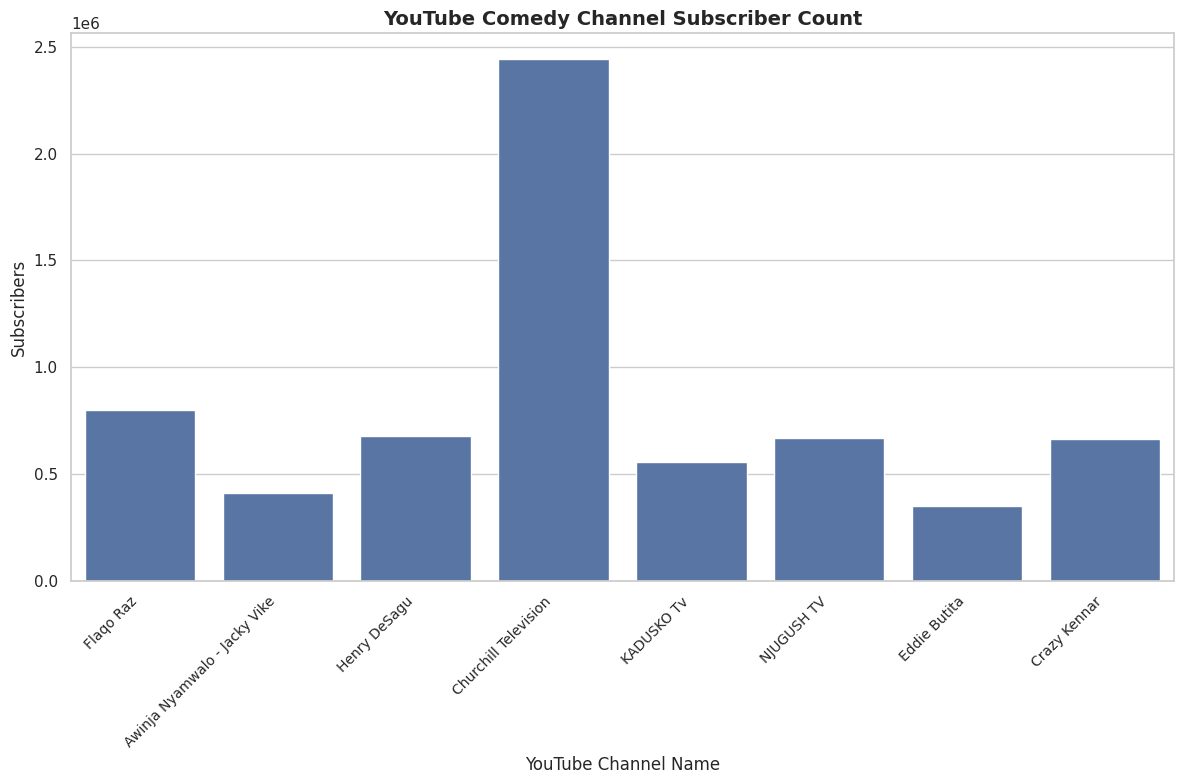

In [12]:
# Set figure size and style
sns.set(style="whitegrid", rc={'figure.figsize':(12, 8)})

# Create the barplot
ax = sns.barplot(x='Channel_name', y='Subscribers', data=comedy_channel_data)

# Improve x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add axis labels and a title
ax.set_xlabel('YouTube Channel Name', fontsize=12)
ax.set_ylabel('Subscribers', fontsize=12)
ax.set_title('YouTube Comedy Channel Subscriber Count', fontsize=14, weight='bold')

# Adjust spacing to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## 2. Lifestyle Category Views by YouTube Channel

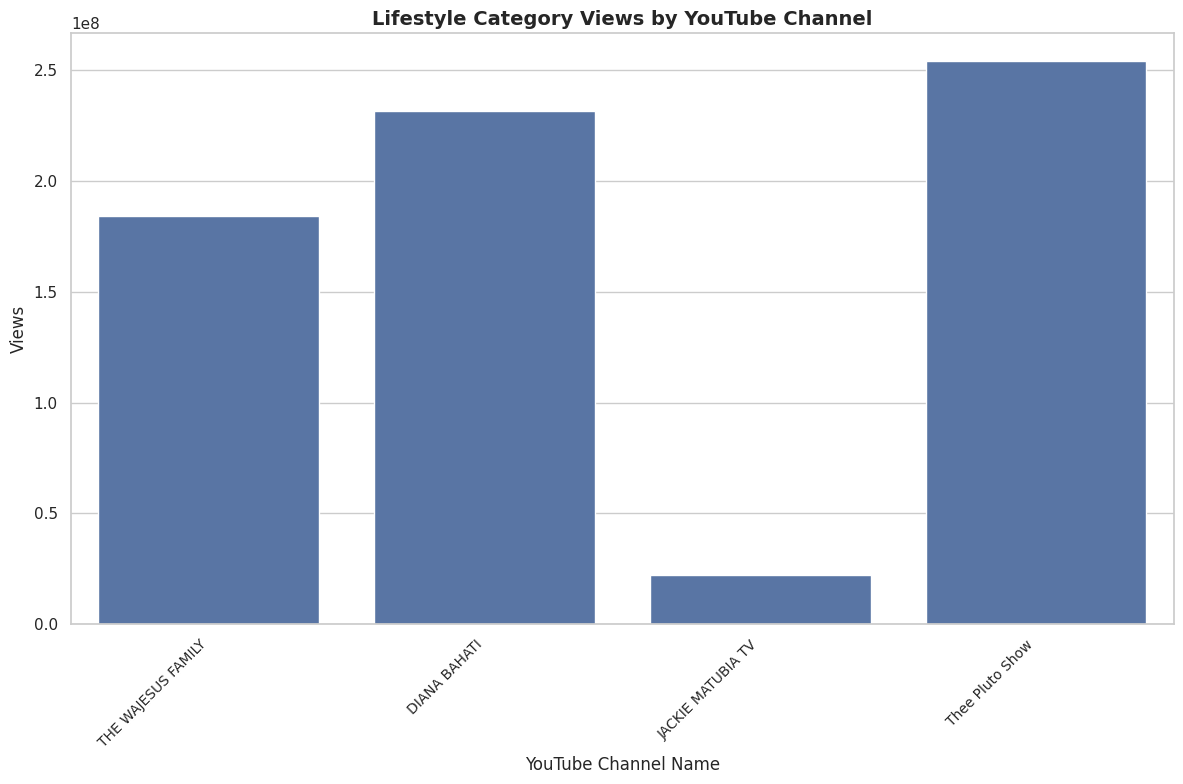

In [14]:
# Set figure size and style
sns.set(style="whitegrid", rc={'figure.figsize':(12, 8)})

# Create the barplot
ax = sns.barplot(x='Channel_name', y='Views', data=lifestyle_channel_data)

# Improve x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add axis labels and a title
ax.set_xlabel('YouTube Channel Name', fontsize=12)
ax.set_ylabel('Views', fontsize=12)
ax.set_title('Lifestyle Category Views by YouTube Channel', fontsize=14, weight='bold')

# Adjust spacing to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## YouTube Lifestyle Channel Subscriber Count

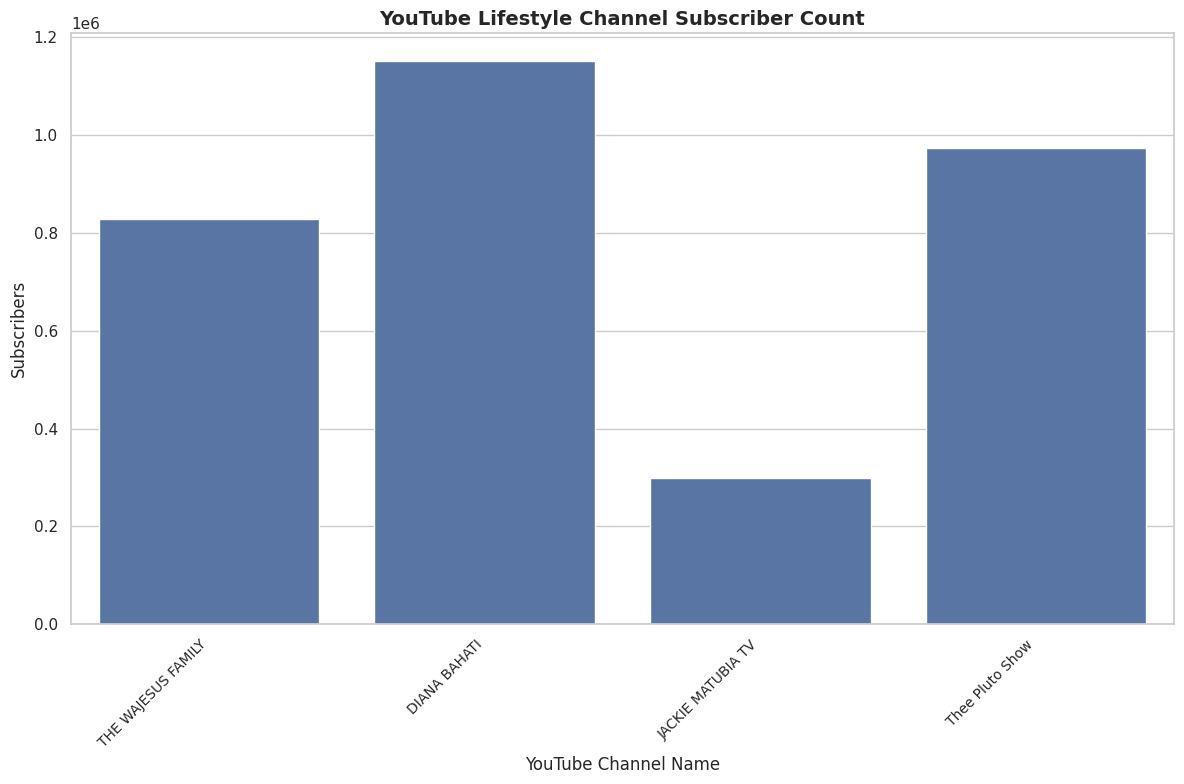

In [15]:
# Set figure size and style
sns.set(style="whitegrid", rc={'figure.figsize':(12, 8)})

# Create the barplot
ax = sns.barplot(x='Channel_name', y='Subscribers', data=lifestyle_channel_data)

# Improve x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add axis labels and a title
ax.set_xlabel('YouTube Channel Name', fontsize=12)
ax.set_ylabel('Subscribers', fontsize=12)
ax.set_title('YouTube Lifestyle Channel Subscriber Count', fontsize=14, weight='bold')

# Adjust spacing to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Save Categories data as CSV.

In [16]:
comedy_channel_data.to_csv('Comedy_analysis.csv', index=False)
story_telling_channel_data.to_csv('Story_telling_analysis.csv', index=False)
podcast_channel_data.to_csv('Podcast_analysis.csv', index=False)
talkshow_channel_data.to_csv('Talkshow_analysis.csv', index=False)
lifestyle_channel_data.to_csv('Lifestyle_analysis.csv', index=False)


# Top three most-watched videos from the channel with the highest views.

## Variable to store Playlist ID for specific channel name

In [17]:
comedy_playlist_id = comedy_channel_data.loc[comedy_channel_data['Channel_name']=='Churchill Television', 'Playlist_id'].iloc[0]
story_telling_playlist_id = story_telling_channel_data.loc[story_telling_channel_data['Channel_name']=='Abel Mutua', 'Playlist_id'].iloc[0]
podcast_playlist_id = podcast_channel_data.loc[podcast_channel_data['Channel_name']=='Lynn Ngugi', 'Playlist_id'].iloc[0]
talkshow_playlist_id = talkshow_channel_data.loc[talkshow_channel_data['Channel_name']=='Tuko / Tuco - Kenya', 'Playlist_id'].iloc[0]
lifestyle_playlist_id = lifestyle_channel_data.loc[lifestyle_channel_data['Channel_name']=='Thee Pluto Show', 'Playlist_id'].iloc[0]


In [18]:
lifestyle_playlist_id

'UUMMmy64_0rySSPUu0xohuCQ'

## Function to get video IDs

In [29]:
# Comedy video IDs
def get_videos_ids(youtube_comedy, comedy_playlist_id):

    request = youtube_comedy.playlistItems().list(
        part = 'contentDetails',
        playlistId = comedy_playlist_id,
        maxResults = 50)

    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
                request = youtube_comedy.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = comedy_playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
                response = request.execute()

                for i in range(len(response['items'])):
                    video_ids.append(response['items'][i]['contentDetails']['videoId'])

                next_page_token = response.get('nextPageToken')
    
    return video_ids


# Story Telling video IDs
def get_videos_ids(youtube_story_telling, story_telling_playlist_id):

    request = youtube_story_telling.playlistItems().list(
        part = 'contentDetails',
        playlistId = story_telling_playlist_id,
        maxResults = 50)

    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
                request = youtube_story_telling.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = story_telling_playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
                response = request.execute()

                for i in range(len(response['items'])):
                    video_ids.append(response['items'][i]['contentDetails']['videoId'])

                next_page_token = response.get('nextPageToken')
    
    return video_ids


# Podcast video IDs
def get_videos_ids(youtube_story_telling, story_telling_playlist_id):

    request = youtube_podcast.playlistItems().list(
        part = 'contentDetails',
        playlistId = story_telling_playlist_id,
        maxResults = 50)

    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
                request = youtube_podcast.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = story_telling_playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
                response = request.execute()

                for i in range(len(response['items'])):
                    video_ids.append(response['items'][i]['contentDetails']['videoId'])

                next_page_token = response.get('nextPageToken')
    
    return video_ids

# Talkshow video IDs
def get_videos_ids(youtube_talkshow, talkshow_playlist_id):

    request = youtube_talkshow.playlistItems().list(
        part = 'contentDetails',
        playlistId = talkshow_playlist_id,
        maxResults = 50)

    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
                request = youtube_talkshow.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = talkshow_playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
                response = request.execute()

                for i in range(len(response['items'])):
                    video_ids.append(response['items'][i]['contentDetails']['videoId'])

                next_page_token = response.get('nextPageToken')
    
    return video_ids


# Lifestyle video IDs
def get_videos_ids(youtube_lifestyle, lifestyle_playlist_id):

    request = youtube_lifestyle.playlistItems().list(
        part = 'contentDetails',
        playlistId = lifestyle_playlist_id,
        maxResults = 50)

    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
                request = youtube_lifestyle.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = lifestyle_playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
                response = request.execute()

                for i in range(len(response['items'])):
                    video_ids.append(response['items'][i]['contentDetails']['videoId'])

                next_page_token = response.get('nextPageToken')
    
    return video_ids


# Podcast video IDs
def get_videos_ids(youtube_podcast, podcast_playlist_id):

    request = youtube_podcast.playlistItems().list(
        part = 'contentDetails',
        playlistId = podcast_playlist_id,
        maxResults = 50)

    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
                request = youtube_podcast.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = podcast_playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
                response = request.execute()

                for i in range(len(response['items'])):
                    video_ids.append(response['items'][i]['contentDetails']['videoId'])

                next_page_token = response.get('nextPageToken')
    
    return video_ids



## Variable to store Video ID for specific channel name

In [30]:
comedy_video_ids = get_videos_ids(youtube_comedy, comedy_playlist_id)
story_telling_video_ids = get_videos_ids(youtube_story_telling, story_telling_playlist_id)
talkshow_video_ids = get_videos_ids(youtube_talkshow, talkshow_playlist_id)
lifestyle_video_ids = get_videos_ids(youtube_lifestyle, lifestyle_playlist_id)
podcast_video_ids = get_videos_ids(youtube_podcast, podcast_playlist_id)

## Function to get video details

In [45]:
# Comedy video details
def get_video_details(youtube_comedy, comedy_video_ids):
    all_video_stats = []
    
    for i in range(0, len(comedy_video_ids), 50):
        # Request video details
        request = youtube_comedy.videos().list(
            part='snippet,statistics',
            id=','.join(comedy_video_ids[i:i+50])
        )
        response = request.execute()
        
        # Extract details from response
        for video in response.get('items', []):  # Handle missing 'items'
            video_stats = dict(
                Title=video['snippet'].get('title', 'N/A'),
                Published_date=video['snippet'].get('publishedAt', 'N/A'),
                Views=video['statistics'].get('viewCount', 0),
                Likes=video['statistics'].get('likeCount', 0),
                Comments=video['statistics'].get('commentCount', 0)
            )
            all_video_stats.append(video_stats)
    
    return all_video_stats


# Story telling video details
def get_video_details(youtube_story_telling, story_telling_video_ids):
    all_video_stats = []
    
    for i in range(0, len(story_telling_video_ids), 50):
        # Request video details
        request = youtube_story_telling.videos().list(
            part='snippet,statistics',
            id=','.join(story_telling_video_ids[i:i+50])
        )
        response = request.execute()
        
        # Extract details from response
        for video in response.get('items', []):  # Handle missing 'items'
            video_stats = dict(
                Title=video['snippet'].get('title', 'N/A'),
                Published_date=video['snippet'].get('publishedAt', 'N/A'),
                Views=video['statistics'].get('viewCount', 0),
                Likes=video['statistics'].get('likeCount', 0),
                Comments=video['statistics'].get('commentCount', 0)
            )
            all_video_stats.append(video_stats)
    
    return all_video_stats


# Talkshow video details
def get_video_details(youtube_talkshow, talkshow_video_ids):
    all_video_stats = []
    
    for i in range(0, len(talkshow_video_ids), 50):
        # Request video details
        request = youtube_talkshow.videos().list(
            part='snippet,statistics',
            id=','.join(talkshow_video_ids[i:i+50])
        )
        response = request.execute()
        
        # Extract details from response
        for video in response.get('items', []):  # Handle missing 'items'
            video_stats = dict(
                Title=video['snippet'].get('title', 'N/A'),
                Published_date=video['snippet'].get('publishedAt', 'N/A'),
                Views=video['statistics'].get('viewCount', 0),
                Likes=video['statistics'].get('likeCount', 0),
                Comments=video['statistics'].get('commentCount', 0)
            )
            all_video_stats.append(video_stats)
    
    return all_video_stats


# Lifestyle video details
def get_video_details(youtube_lifestyle, lifestyle_video_ids):
    all_video_stats = []
    
    for i in range(0, len(lifestyle_video_ids), 50):
        # Request video details
        request = youtube_lifestyle.videos().list(
            part='snippet,statistics',
            id=','.join(lifestyle_video_ids[i:i+50])
        )
        response = request.execute()
        
        # Extract details from response
        for video in response.get('items', []):  # Handle missing 'items'
            video_stats = dict(
                Title=video['snippet'].get('title', 'N/A'),
                Published_date=video['snippet'].get('publishedAt', 'N/A'),
                Views=video['statistics'].get('viewCount', 0),
                Likes=video['statistics'].get('likeCount', 0),
                Favourite=video['statistics'].get('favoriteCount', 0),
                Comments=video['statistics'].get('commentCount', 0)
            )
            all_video_stats.append(video_stats)
    
    return all_video_stats


# Lifestyle video details
def get_video_details(youtube_podcast, podcast_video_ids):
    all_video_stats = []
    
    for i in range(0, len(podcast_video_ids), 50):
        # Request video details
        request = youtube_podcast.videos().list(
            part='snippet,statistics',
            id=','.join(podcast_video_ids[i:i+50])
        )
        response = request.execute()
        
        # Extract details from response
        for video in response.get('items', []):  # Handle missing 'items'
            video_stats = dict(
                Title=video['snippet'].get('title', 'N/A'),
                Published_date=video['snippet'].get('publishedAt', 'N/A'),
                Views=video['statistics'].get('viewCount', 0),
                Likes=video['statistics'].get('likeCount', 0),
                Comments=video['statistics'].get('commentCount', 0)
            )
            all_video_stats.append(video_stats)
    
    return all_video_stats


## Variable to store Video details for specific channel name

In [46]:
comedy_video_details = get_video_details(youtube_comedy, comedy_video_ids)
story_telling_video_details = get_video_details(youtube_story_telling, story_telling_video_ids)
talkshow_video_details = get_video_details(youtube_talkshow, talkshow_video_ids)
lifestyle_video_details = get_video_details(youtube_lifestyle, lifestyle_video_ids)
podcast_video_details = get_video_details(youtube_podcast, podcast_video_ids)

## Convert to Pandas DataFrame

In [47]:
comedy_video_data = pd.DataFrame(comedy_video_details)
story_telling_video_data =  pd.DataFrame(story_telling_video_details)
talkshow_video_data  = pd.DataFrame(talkshow_video_details)
lifestyle_video_data  = pd.DataFrame(lifestyle_video_details)
podcast_video_data  = pd.DataFrame(podcast_video_details)

In [48]:
# Check data
story_telling_video_data

,Title,Published_date,Views,Likes,Comments
0,It’s A Sign - Mkurugenzi Minisodes 8 Ep 5,2025-01-01T17:30:06Z,94322,3081,315
1,Trapped In The Mountains -Headline Hitters 9 Ep 8,2024-12-29T17:40:06Z,144600,4146,380
2,Hell Of A Ride - Young & Stupid 9 Ep 2,2024-12-22T17:15:06Z,249034,5660,639
3,K-Rupt Tribute- Headline Hitters 9 Ep 7,2024-12-15T17:00:06Z,368416,8536,898
4,Jabaration - Mkurugenzi Minisode 8 Ep 4,2024-12-11T19:00:06Z,205023,5223,346
...,...,...,...,...,...
471,Mothers' Day Edition - Young & Stupid 1 Ep 5,2020-05-13T11:51:49Z,230498,9717,1161
472,Robbed at Bible point - Young & Stupid 1 Ep 4,2020-05-09T22:20:12Z,252227,9373,470
473,The Burner-Boys of RTI - Young & Stupid 1 Ep 3,2020-05-09T20:31:18Z,225244,7932,463
474,A Psycho-Fan - Young & Stupid 1 Ep 2,2020-05-09T20:13:04Z,542475,12937,653


## Data cleaning

In [54]:
# Comedy
comedy_video_data['Published_date'] = pd.to_datetime(comedy_video_data['Published_date']).dt.date
comedy_video_data['Views'] = pd.to_numeric(comedy_video_data['Views'])
comedy_video_data['Likes'] = pd.to_numeric(comedy_video_data['Likes'])
comedy_video_data['Favorites'] = pd.to_numeric(comedy_video_data['Views'])
comedy_video_data['Comments'] = pd.to_numeric(comedy_video_data['Comments'])

# Story telling
story_telling_video_data['Published_date'] = pd.to_datetime(story_telling_video_data['Published_date']).dt.date
story_telling_video_data['Views'] = pd.to_numeric(story_telling_video_data['Views'])
story_telling_video_data['Likes'] = pd.to_numeric(story_telling_video_data['Likes'])
story_telling_video_data['Favorites'] = pd.to_numeric(story_telling_video_data['Favorites'])
story_telling_video_data['Comments'] = pd.to_numeric(story_telling_video_data['Comments'])

# Talkshow
talkshow_video_data['Published_date'] = pd.to_datetime(talkshow_video_data['Published_date']).dt.date
talkshow_video_data['Views'] = pd.to_numeric(talkshow_video_data['Views'])
talkshow_video_data['Likes'] = pd.to_numeric(talkshow_video_data['Likes'])
talkshow_video_data['Favorites'] = pd.to_numeric(talkshow_video_data['Favorites'])
talkshow_video_data['Comments'] = pd.to_numeric(talkshow_video_data['Comments'])

# LIfestyle
lifestyle_video_data['Published_date'] = pd.to_datetime(lifestyle_video_data['Published_date']).dt.date
lifestyle_video_data['Views'] = pd.to_numeric(lifestyle_video_data['Views'])
lifestyle_video_data['Likes'] = pd.to_numeric(lifestyle_video_data['Likes'])
lifestyle_video_data['Favorites'] = pd.to_numeric(lifestyle_video_data['Favorites'])
lifestyle_video_data['Comments'] = pd.to_numeric(lifestyle_video_data['Comments'])

# Podcast
podcast_video_data['Published_date'] = pd.to_datetime(podcast_video_data['Published_date']).dt.date
podcast_video_data['Views'] = pd.to_numeric(podcast_video_data['Views'])
podcast_video_data['Likes'] = pd.to_numeric(podcast_video_data['Likes'])
podcast_video_data['Favorites'] = pd.to_numeric(podcast_video_data['Views'])
podcast_video_data['Comments'] = pd.to_numeric(podcast_video_data['Comments'])

In [55]:
podcast_video_data

,Title,Published_date,Views,Likes,Comments,Favorites
0,You donated millions to Viona after sharing he...,2024-12-24,66064,1200,157,66064
1,"My own daughter set me up, ended up spending 1...",2024-12-23,104476,1902,503,104476
2,"The real spiritual problem in Kenya, how polit...",2024-12-20,306095,7734,1662,306095
3,Why foreigners can easily own limitless land i...,2024-12-18,30392,469,228,30392
4,Why these American men are settling in Kenya a...,2024-12-17,152937,2739,1011,152937
...,...,...,...,...,...,...
502,Lynn Ngugi's date with Brayo Chizi in Nakuru,2020-11-06,190749,5427,976,190749
503,Lynn Ngugi on living a fake life and other lif...,2020-06-19,60507,2239,490,60507
504,Who is Lynn Ngugi | Biography | Get to know me...,2019-12-20,345112,7744,1295,345112
505,Top 5 Small Business Ideas in Kenya with low I...,2016-06-16,54799,526,52,54799


# Identify the top 3 videos

In [58]:
comedy_top_videos = comedy_video_data.sort_values(by='Views', ascending=False).head(3)
story_telling_top_videos = story_telling_video_data.sort_values(by='Views', ascending=False).head(3)
talkshow_top_videos = talkshow_video_data.sort_values(by='Views', ascending=False).head(3)
lifestyle_top_videos = lifestyle_video_data.sort_values(by='Views', ascending=False).head(3)
podcast_top_videos = podcast_video_data.sort_values(by='Views', ascending=False).head(3)

# Visualization of the top 3 watched videos

## Top 3 Comedy Video Views (Churchill Television)

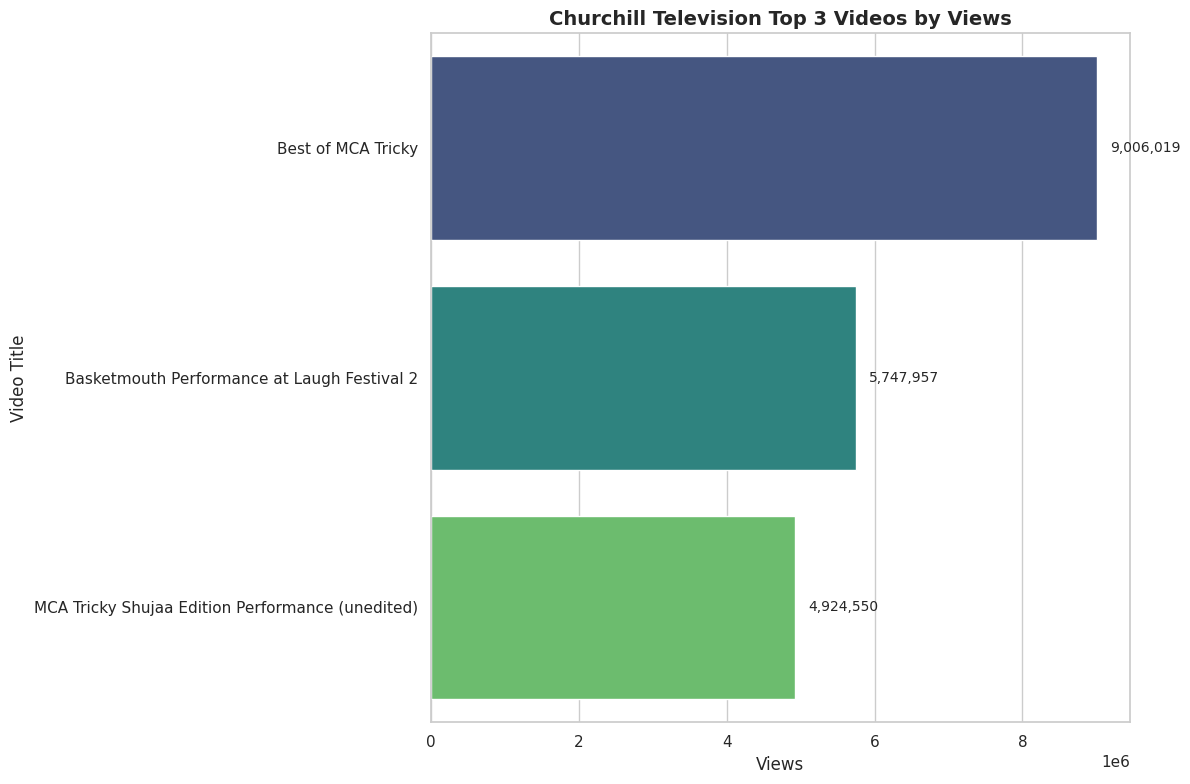

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Sort data to ensure bars are in descending order
top_videos_sorted = comedy_top_videos.sort_values(by='Views', ascending=False)

# Set Seaborn style and figure size
sns.set(style="whitegrid", rc={'figure.figsize': (12, 8)})

# Generate gradient colors using Seaborn's palette
palette = sns.color_palette("viridis", len(top_videos_sorted))

# Create the barplot with manual coloring
ax1 = sns.barplot(
    x='Views',
    y='Title',
    data=top_videos_sorted,
    hue='Title',  # Assign hue to Title to avoid warnings
    dodge=False,
    palette=palette
)

# Add data labels to the bars
for i, view in enumerate(top_videos_sorted['Views']):
    ax1.text(view + 0.02 * max(top_videos_sorted['Views']), i, f'{view:,}', va='center', fontsize=10)

# Add axis labels and a title
ax1.set_xlabel('Views', fontsize=12)
ax1.set_ylabel('Video Title', fontsize=12)
ax1.set_title('Churchill Television Top 3 Videos by Views', fontsize=14, weight='bold')

# Adjust spacing to ensure readability
plt.tight_layout()

# Show the plot
plt.show()


## Top 3 Stort Telling Video Views (Abel Mutua)

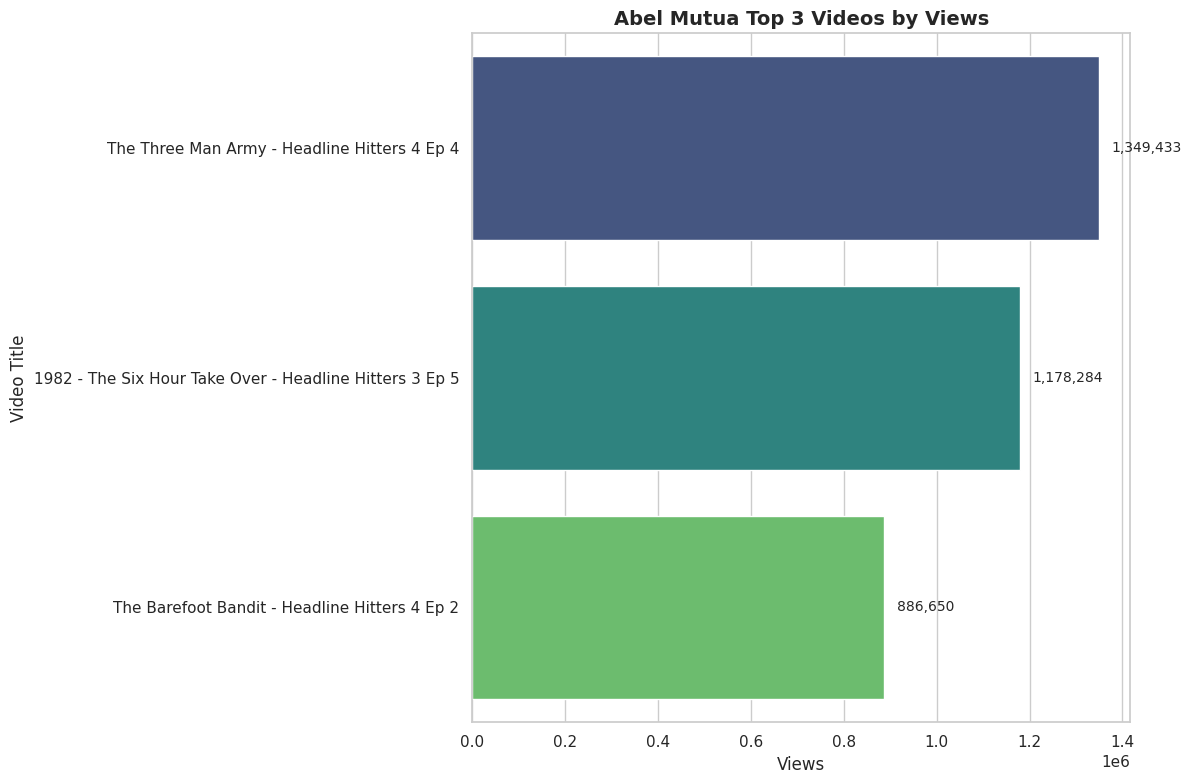

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Sort data to ensure bars are in descending order
top_videos_sorted = story_telling_top_videos.sort_values(by='Views', ascending=False)

# Set Seaborn style and figure size
sns.set(style="whitegrid", rc={'figure.figsize': (12, 8)})

# Generate gradient colors using Seaborn's palette
palette = sns.color_palette("viridis", len(top_videos_sorted))

# Create the barplot with manual coloring
ax1 = sns.barplot(
    x='Views',
    y='Title',
    data=top_videos_sorted,
    hue='Title',  # Assign hue to Title to avoid warnings
    dodge=False,
    palette=palette
)

# Add data labels to the bars
for i, view in enumerate(top_videos_sorted['Views']):
    ax1.text(view + 0.02 * max(top_videos_sorted['Views']), i, f'{view:,}', va='center', fontsize=10)

# Add axis labels and a title
ax1.set_xlabel('Views', fontsize=12)
ax1.set_ylabel('Video Title', fontsize=12)
ax1.set_title('Abel Mutua Top 3 Videos by Views', fontsize=14, weight='bold')

# Adjust spacing to ensure readability
plt.tight_layout()

# Show the plot
plt.show()


## Top 3 Talkshow Video Views (Tuko TV)

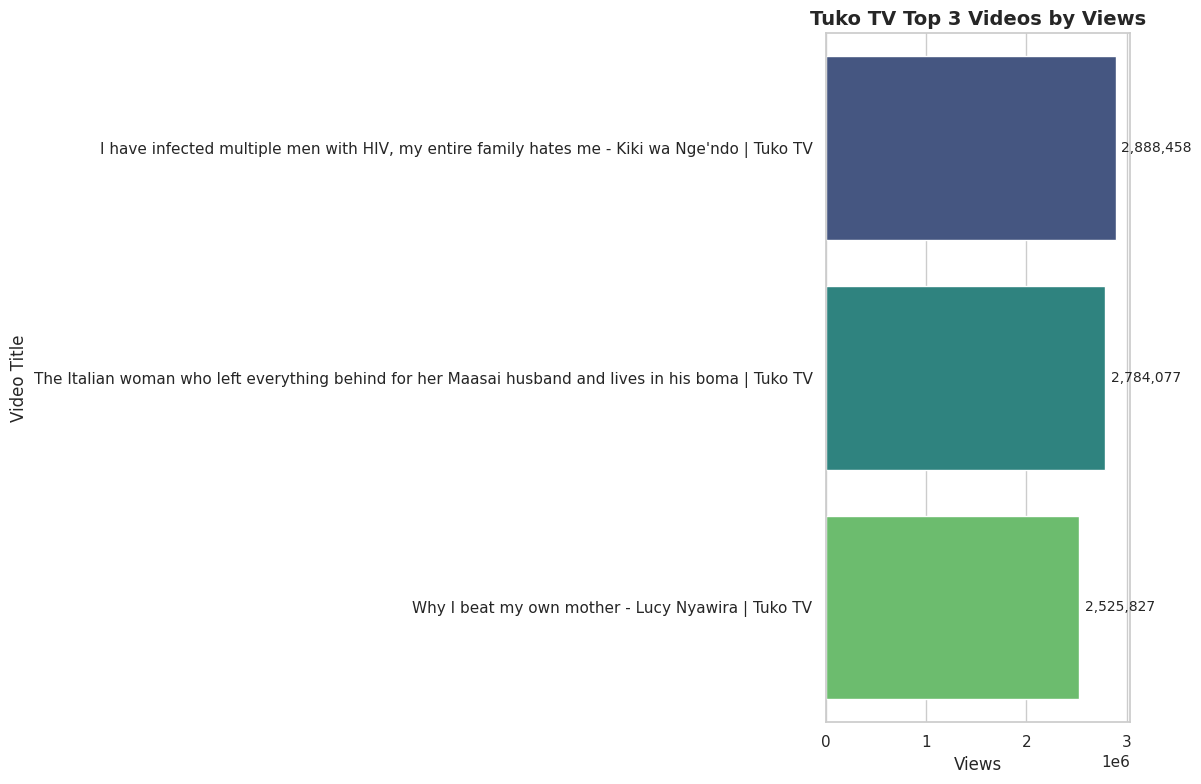

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Sort data to ensure bars are in descending order
top_videos_sorted = talkshow_top_videos.sort_values(by='Views', ascending=False)

# Set Seaborn style and figure size
sns.set(style="whitegrid", rc={'figure.figsize': (12, 8)})

# Generate gradient colors using Seaborn's palette
palette = sns.color_palette("viridis", len(top_videos_sorted))

# Create the barplot with manual coloring
ax1 = sns.barplot(
    x='Views',
    y='Title',
    data=top_videos_sorted,
    hue='Title',  # Assign hue to Title to avoid warnings
    dodge=False,
    palette=palette
)

# Add data labels to the bars
for i, view in enumerate(top_videos_sorted['Views']):
    ax1.text(view + 0.02 * max(top_videos_sorted['Views']), i, f'{view:,}', va='center', fontsize=10)

# Add axis labels and a title
ax1.set_xlabel('Views', fontsize=12)
ax1.set_ylabel('Video Title', fontsize=12)
ax1.set_title('Tuko TV Top 3 Videos by Views', fontsize=14, weight='bold')

# Adjust spacing to ensure readability
plt.tight_layout()

# Show the plot
plt.show()


## Top 3 Lifestyle Video Views (Thee Pluto)

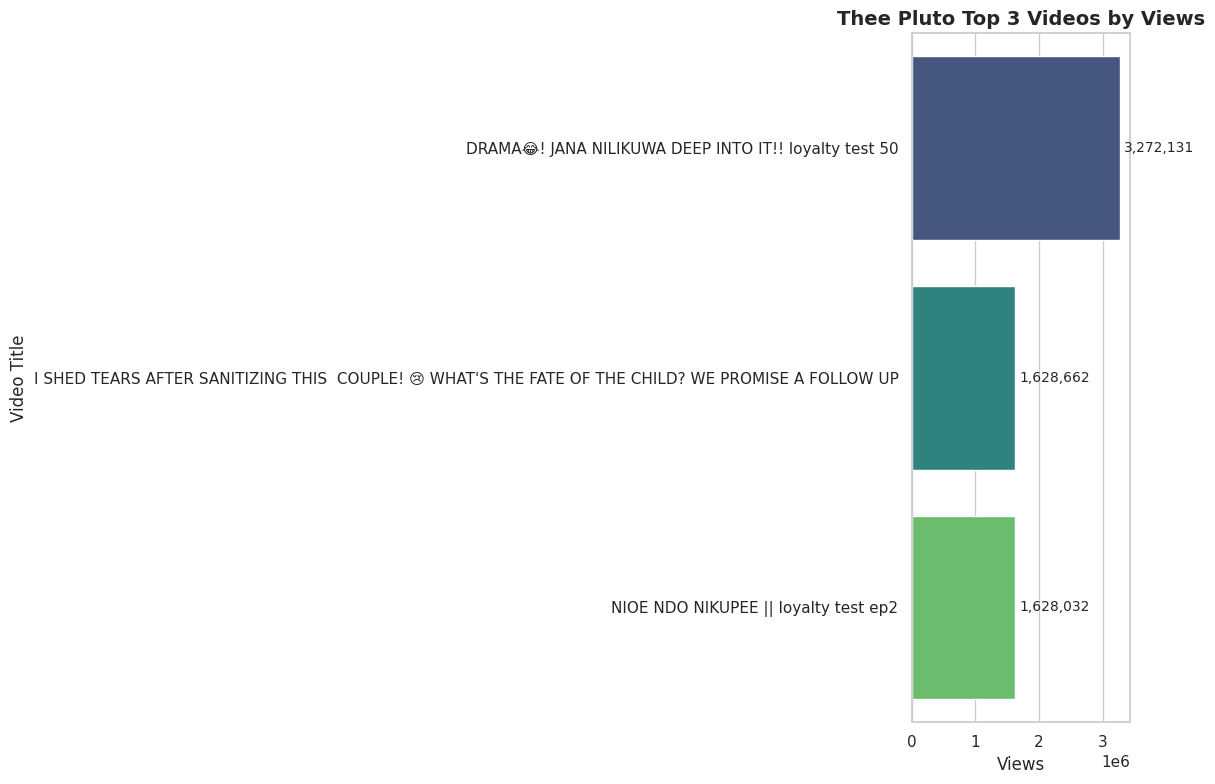

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Sort data to ensure bars are in descending order
top_videos_sorted = lifestyle_top_videos.sort_values(by='Views', ascending=False)

# Set Seaborn style and figure size
sns.set(style="whitegrid", rc={'figure.figsize': (12, 8)})

# Generate gradient colors using Seaborn's palette
palette = sns.color_palette("viridis", len(top_videos_sorted))

# Create the barplot with manual coloring
ax1 = sns.barplot(
    x='Views',
    y='Title',
    data=top_videos_sorted,
    hue='Title',  # Assign hue to Title to avoid warnings
    dodge=False,
    palette=palette
)

# Add data labels to the bars
for i, view in enumerate(top_videos_sorted['Views']):
    ax1.text(view + 0.02 * max(top_videos_sorted['Views']), i, f'{view:,}', va='center', fontsize=10)

# Add axis labels and a title
ax1.set_xlabel('Views', fontsize=12)
ax1.set_ylabel('Video Title', fontsize=12)
ax1.set_title('Thee Pluto Top 3 Videos by Views', fontsize=14, weight='bold')

# Adjust spacing to ensure readability
plt.tight_layout()

# Show the plot
plt.show()


## Top 3 Podcast Video Views (Lynn Ngugi)

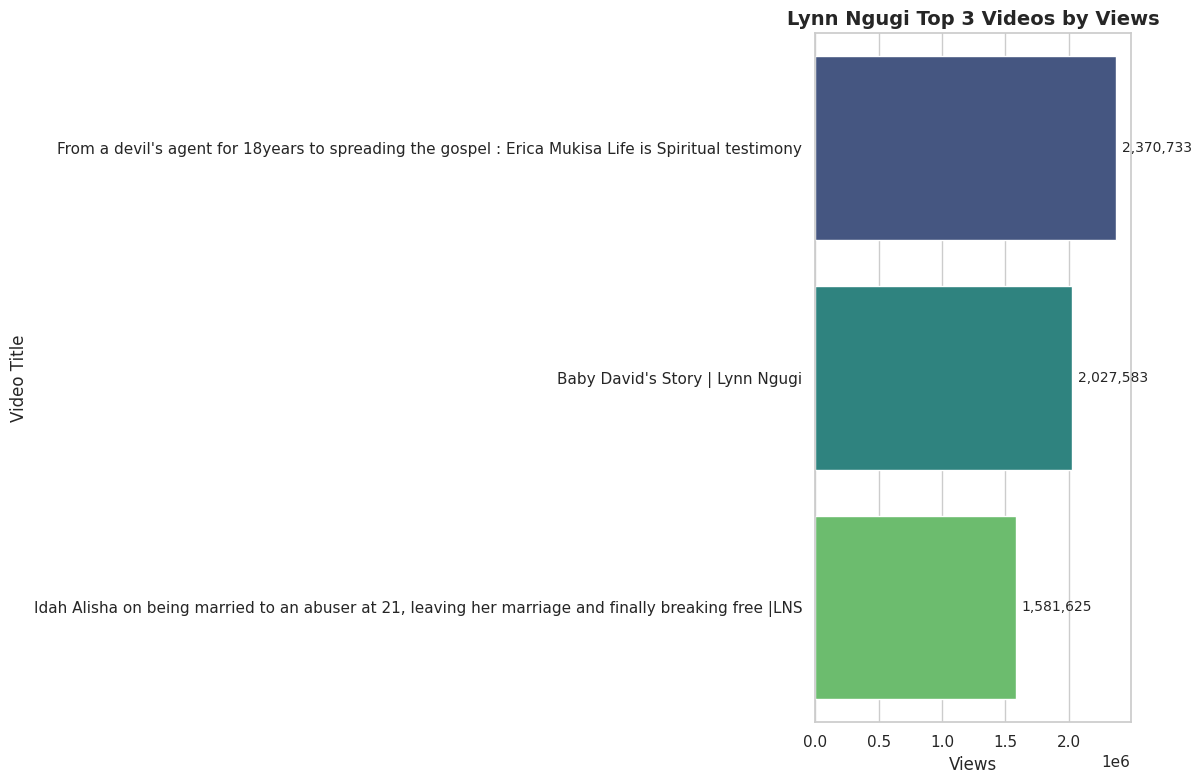

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Sort data to ensure bars are in descending order
top_videos_sorted = podcast_top_videos.sort_values(by='Views', ascending=False)

# Set Seaborn style and figure size
sns.set(style="whitegrid", rc={'figure.figsize': (12, 8)})

# Generate gradient colors using Seaborn's palette
palette = sns.color_palette("viridis", len(top_videos_sorted))

# Create the barplot with manual coloring
ax1 = sns.barplot(
    x='Views',
    y='Title',
    data=top_videos_sorted,
    hue='Title',  # Assign hue to Title to avoid warnings
    dodge=False,
    palette=palette
)

# Add data labels to the bars
for i, view in enumerate(top_videos_sorted['Views']):
    ax1.text(view + 0.02 * max(top_videos_sorted['Views']), i, f'{view:,}', va='center', fontsize=10)

# Add axis labels and a title
ax1.set_xlabel('Views', fontsize=12)
ax1.set_ylabel('Video Title', fontsize=12)
ax1.set_title('Lynn Ngugi Top 3 Videos by Views', fontsize=14, weight='bold')

# Adjust spacing to ensure readability
plt.tight_layout()

# Show the plot
plt.show()


## Save Top 3 Videos data as CSV.

In [76]:
comedy_top_videos.to_csv('Comedy_top_views.csv', index=False)
story_telling_top_videos.to_csv('story_telling_top_views.csv', index=False)
talkshow_top_videos.to_csv('talkshow_top_views.csv', index=False)
lifestyle_top_videos.to_csv('lifestyle_top_views.csv', index=False)
podcast_top_videos.to_csv('podcast_top_views.csv', index=False)